In [1]:
import statsmodels.api as sm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#
# we get datasets directly from stasmodels
df = sm.datasets.macrodata.load_pandas().data
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [3]:
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [4]:
#
# we want to use year as a timeseries index
# you can do it with normal pandas functions but statsmodels also provide a way to do it
# note that the function takes strings values and in this case we want to use values that match
# our time series that starts at 1959 Q1 and end ends in 2009 Q3 (you can check with by running tail on the df)
new_index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [5]:
df.index = new_index

<Axes: >

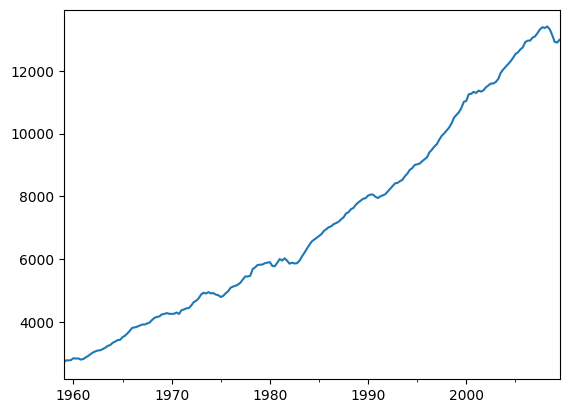

In [6]:
df['realgdp'].plot()

In [7]:
# now we usestatsmodels to get the 3 components of the time series (no seasonal)
# - trend
# - cyclical
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
#
result = sm.tsa.filters.hpfilter(df['realgdp'])
#
# the result is a tuple with 2 elements and each element is a series
print(type(result))
print(len(result))
print(len(result[0]))

#
# the 2 series returned are the estimated cycle and estimated trend

<class 'tuple'>
2
203


<Axes: >

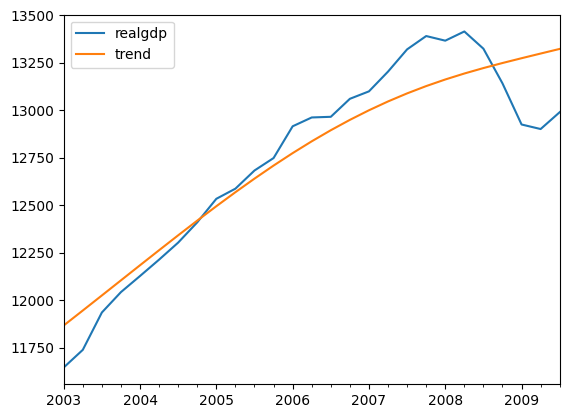

In [8]:
gdp_cycle,gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])
df['trend'] = gdp_trend
#
# we zoom in to get abeeter view
df[['realgdp','trend']]['2003-01-01':].plot()

In [9]:
##############################################
##
##       EWMA MODELS
##
#############################################
# EWMA stands for Exponential weighted moving average
# if we start taking moving averages we can identify a trend in the signal and in particular,
# the longer is the period we average the more clear is the general trend
#
# we can improve approximation by giving weights to the different averages
# however there are also weaknesses (for simple moving averages SMA):
# - smaller windows lead to noisy signal
# - always lag by the size of the window
# - never reaches the extremes (peak/valleys) of the data (given that it's anaverage)
# - it does not inform about future behaviour.. it just describes trends in the data
# - extreme historical values can skew signficantly
#
# EWMA reduces the lag effect from SMA by using higher weght on more recent values



##############################################
##
##       ETS MODELS
##
#############################################
# ETS modesl are Error-Trend and Seasonality models
# - Error Term
# - Trend Term
# - Seasonality Term
# we take one term for each aand add them, multply them or possibly even leave them out
# time series decomposition breaks a time seris on those terms to understand the behaviour
#
# A famous dataset to start with this is Airline passgengers during time (from 1949 to the 60s)




In [56]:
##############################################
##
##       EWMA MODELS
##
#############################################
#
# note that:
# - we use the month column as index
# - there are some points that don't have a month value
df = pd.read_csv('data/ch9/airline_passengers.csv')
#
# note could have used:
# df = pd.read_csv('data/ch9/airline_passengers.csv', index_col='Month')

In [59]:
#
# this is useful to verify if there are null values:
# - check every value if it is null: returns a series with an index of bool: True or False (if not null)
# - get the values only (i.e. remove the index) (optional?)
# - - checks if any valu is true
print(df['Month'].isnull().values.any() )
print("------")
print(df['Month'].isnull().values.any() == df['Month'].isnull().any())
#
# we drop the na if there are and we set the index
df.dropna(inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',drop=True, inplace=True)
print("----------")
print(df.info())
df

False
------
True
----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1949-12-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  133 non-null    float64
 1   6-month-SMA              133 non-null    float64
 2   12-month-SMA             133 non-null    float64
dtypes: float64(3)
memory usage: 4.2 KB
None


Thousands of Passengers  6-month-SMA  12-month-SMA
Month                                                         
1949-12-01                    118.0   128.833333    126.666667
1950-01-01                    115.0   123.333333    126.916667
1950-02-01                    126.0   119.666667    127.583333
1950-03-01                    141.0   120.500000    128.333333
1950-04-01                    135.0   123.166667    128.833333
...                             ...          ...           ...
1960-08-01                    606.0   519.166667    463.333333
1960-09-01                    508.0   534.000000    467.083333
1960-10-01                    461.0   534.000000    471.583333
1960-11-01                    390.0   520.333333    473.916667
1960-12-01                    432.0   503.166667    476.166667

[133 rows x 3 columns]

<Axes: xlabel='Month'>

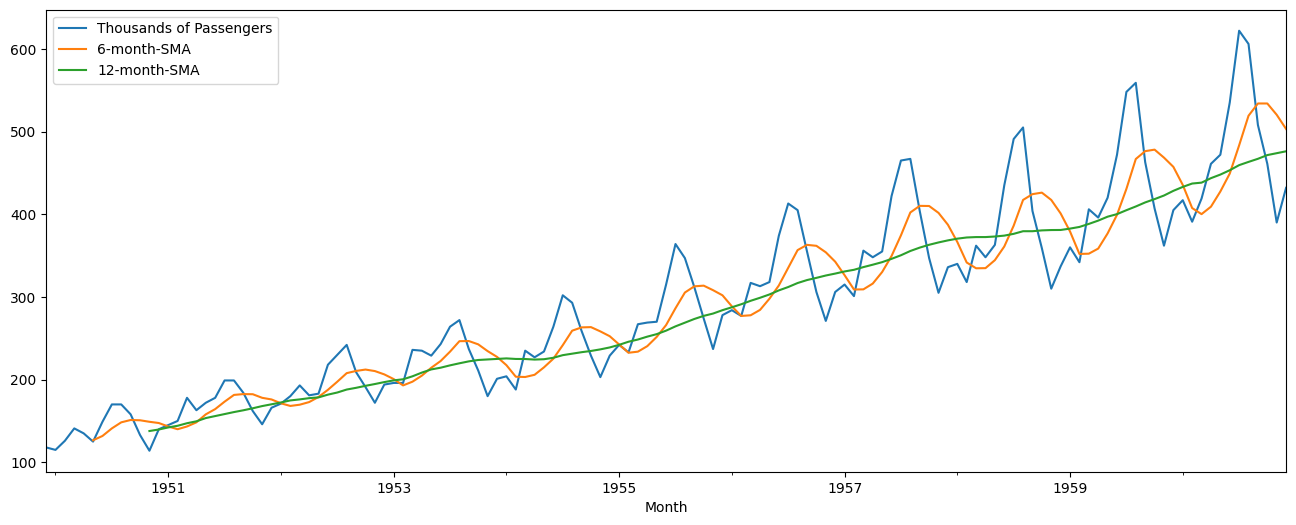

In [61]:
df['6-month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()
df.plot(figsize=(16,6))

<Axes: xlabel='Month'>

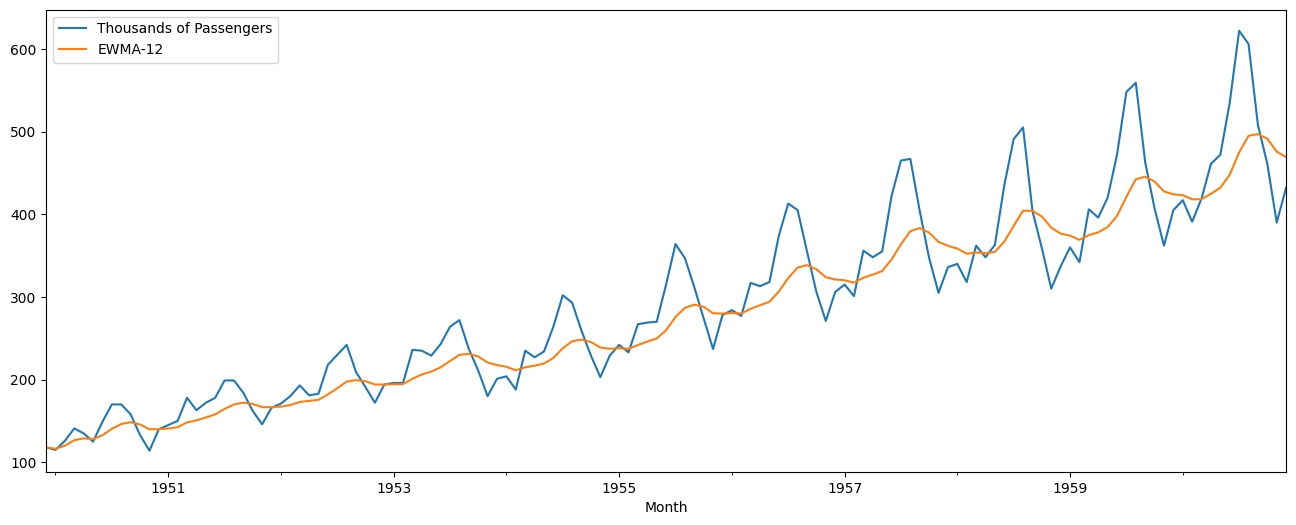

In [67]:
#
# the arguments for the ewm fnction are:
# - span: this is the window size
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(16,6))